## Observations and Insights 

In [1]:
#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


#get study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


#read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


#combine the data into a single dataset

study_data_complete = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')


#display the data table for preview

study_data_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
#checking the number of mice

len(study_data_complete['Mouse ID'].unique())

249

In [3]:
#getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 

duplicateMouse = study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']).any()
duplicates = study_data_complete['Mouse ID'].value_counts()
duplicates_df = pd.DataFrame(duplicates)
duplicates_df = duplicates_df.rename(columns={'Mouse ID':'Count of Mouse ID'})
duplicates_df.head()


Count of Mouse ID
g989                 13
f545                 10
c758                 10
q597                 10
z581                 10

In [4]:
#set index to mouse ID
#get all the data for the duplicate mouse IDs 


study_data_mouse_index = study_data_complete.set_index('Mouse ID')
study_data_mouse_index.head()

#check mouse data for duplicates id

duplicates_data = study_data_mouse_index.loc[['g989', 'y769', 'm650', 'r554', 'l509'],:]
duplicates_data.head(10)


Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
g989              0           45.000000                 0     Propriva   
g989              0           45.000000                 0     Propriva   
g989              5           48.786801                 0     Propriva   
g989              5           47.570392                 0     Propriva   
g989             10           51.745156                 0     Propriva   
g989             10           49.880528                 0     Propriva   
g989             15           51.325852                 1     Propriva   
g989             15           53.442020                 0     Propriva   
g989             20           55.326122                 1     Propriva   
g989             20           54.657650                 1     Propriva   

             Sex  Age_months  Weight (g)  
Mouse ID                                  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26

In [5]:
#create a clean DataFrame by dropping the duplicate mice by their IDs

study_data_clean = study_data_complete.drop_duplicates('Mouse ID')
study_data_clean.head(10)


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   
5     h246          0                45.0                 0     Ketapril   
6     p189          0                45.0                 0     Ketapril   
7     n923          0                45.0                 0     Ketapril   
8     q119          0                45.0                 0     Ketapril   
9     f993          0                45.0                 0     Naftisol   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  
5    Male          13          30  
6    Male           8          28  
7    Male          19          30  
8    Male          17          30  
9    Male          21          28

In [6]:
#checking the number of mice in the clean DataFrame

len(study_data_clean['Mouse ID'])

249

## Summary Statistics

In [7]:
#generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each drug regimen

tumor_volume = study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

mean_tumor_volume = tumor_volume.mean()
median_tumor_volume = tumor_volume.median()
var_tumor_volume = tumor_volume.var()
std_tumor_volume = tumor_volume.std()
sem_tumor_volume = tumor_volume.sem()

drug_tumor_df = pd.DataFrame({
   'Mean Tumor Volume':mean_tumor_volume,
   'Median Tumor Volume':median_tumor_volume,
   'Var Tumor Volume':var_tumor_volume,
   'Std Tumor Volume':std_tumor_volume,
   'SEM Tumor Volume':sem_tumor_volume, 
})

drug_tumor_df.head(20)


Mean Tumor Volume  Median Tumor Volume  Var Tumor Volume  \
Drug Regimen                                                             
Capomulin             40.675741            41.557809         24.947764   
Ceftamin              52.591172            51.776157         39.290177   
Infubinol             52.884795            51.820584         43.128684   
Ketapril              55.235638            53.698743         68.553577   
Naftisol              54.331565            52.509285         66.173479   
Placebo               54.033581            52.288934         61.168083   
Propriva              52.322552            50.854632         42.351070   
Ramicane              40.216745            40.673236         23.486704   
Stelasyn              54.233149            52.431737         59.450562   
Zoniferol             53.236507            51.818479         48.533355   

              Std Tumor Volume  SEM Tumor Volume  
Drug Regimen                                      
Capomulin             4.994774          0.329346  
Ceftamin              6.268188          0.469821  
Infubinol             6.567243          0.492236  
Ketapril              8.279709          0.603860  
Naftisol              8.134708          0.596466  
Placebo               7.821003          0.581331  
Propriva              6.507770          0.512884  
Ramicane              4.846308          0.320955  
Stelasyn              7.710419          0.573111  
Zoniferol             6.966589          0.516398

In [8]:
#using the aggregation method, produce the same summary statistics in a single line

drug_tumor_df = study_data_complete.groupby('Drug Regimen').agg(Mean_Tumor_Volume = ('Tumor Volume (mm3)', np.mean),
Median_Tumor_Volume = ('Tumor Volume (mm3)', np.median),
Variance_Tumor_Volume = ('Tumor Volume (mm3)', np.var),
Stdev_Tumor_Volume = ('Tumor Volume (mm3)', np.std),
SEM_Tumor_Volume = ('Tumor Volume (mm3)', st.sem))
drug_tumor_df.head()

Mean_Tumor_Volume  Median_Tumor_Volume  Variance_Tumor_Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   

              Stdev_Tumor_Volume  SEM_Tumor_Volume  
Drug Regimen                                        
Capomulin               4.994774          0.329346  
Ceftamin                6.268188          0.469821  
Infubinol               6.567243          0.492236  
Ketapril                8.279709          0.603860  
Naftisol                8.134708          0.596466

## Bar and Pie Charts

In [9]:
#generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

measures_per_drug = study_data_clean['Drug Regimen'].value_counts()
drug_measures_df = pd.DataFrame({'Mice Count':measures_per_drug})

drug_measures_df.head(20)



Mice Count
Zoniferol          25
Placebo            25
Ketapril           25
Capomulin          25
Ramicane           25
Propriva           25
Infubinol          25
Naftisol           25
Ceftamin           25
Stelasyn           24

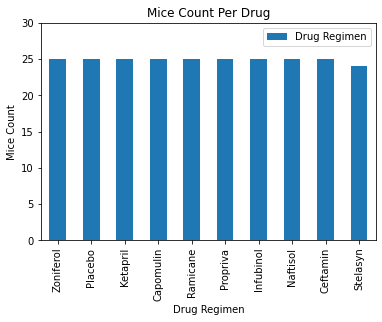

In [10]:

bar_chart = drug_measures_df.plot.bar(title='Mice Count Per Drug', ylim=(0,30), xlabel='Drug Regimen', ylabel='Mice Count', align='center')
bar_chart.legend(['Drug Regimen'])


<BarContainer object of 10 artists>

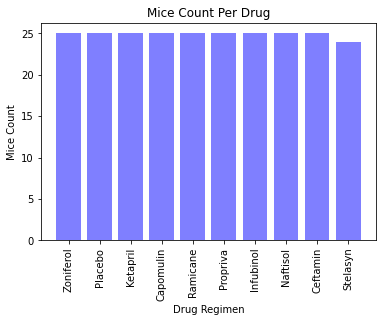

In [11]:
#generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot

x_axis = study_data_clean['Drug Regimen'].value_counts().keys()
y_axis = measures_per_drug

plt.xticks(rotation=90)
plt.title('Mice Count Per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align='center')



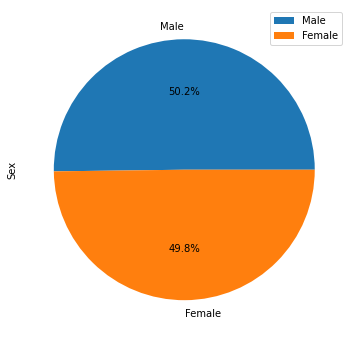

In [12]:
#generate a pie plot showing the distribution of female versus male mice using pandas

pie_plot_df = pd.DataFrame(study_data_clean['Sex'].value_counts())
plot = pie_plot_df.plot.pie(subplots=True, figsize=(6, 6), autopct='%1.1f%%')



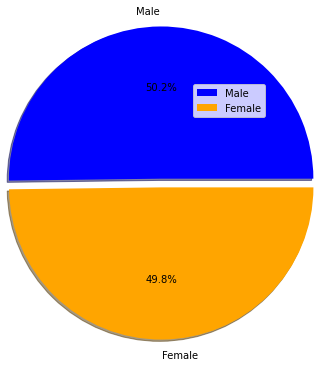

In [13]:
#generate a pie plot showing the distribution of female versus male mice using pyplot
#exploding and shadowing by larger value for fun

values = study_data_clean['Sex'].value_counts() 
labels = study_data_clean['Sex'].value_counts().keys()
colors = ['blue', 'orange']
explode = [0.1, 0]


plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, radius=1.75)
plt.legend(study_data_clean['Sex'].value_counts().keys())
plt.legend(loc='best')
plt.show()
 


## Quartiles, Outliers and Boxplots

In [39]:
#calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

study_data_clean_too = study_data_complete.drop_duplicates({'Mouse ID', 'Timepoint'})

max_timepoints = pd.DataFrame(study_data_clean_too.groupby(['Mouse ID'])['Timepoint'].max())

max_timepoints_merge = max_timepoints.merge(study_data_clean_too, on=['Mouse ID', 'Timepoint'], how='left')

study_data_4drugs = max_timepoints_merge.loc[(max_timepoints_merge['Drug Regimen'] == 'Capomulin') | (max_timepoints_merge['Drug Regimen'] == 'Ramicane')
                                       | (max_timepoints_merge['Drug Regimen'] == 'Infubinol') | (max_timepoints_merge['Drug Regimen'] == 'Ceftamin'), :]

study_data_4drugs = study_data_4drugs.sort_values('Timepoint')
study_data_4drugs = study_data_4drugs.set_index('Mouse ID')

study_data_4drugs = study_data_4drugs[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Sex', 
                                       'Age_months', 'Weight (g)']]
study_data_4drugs.head(20)



Drug Regimen  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Mouse ID                                                                 
t573         Ceftamin          0           45.000000                 0   
u153         Ceftamin          0           45.000000                 0   
x226         Ceftamin          0           45.000000                 0   
b447         Ceftamin          0           45.000000                 0   
v339        Infubinol          5           46.250112                 0   
m756        Infubinol          5           47.010364                 1   
h531         Ceftamin          5           47.784682                 0   
w678         Ramicane          5           43.166373                 0   
c326        Infubinol          5           36.321346                 0   
o813        Infubinol          5           45.699331                 0   
l558         Ceftamin         10           46.784535                 0   
w150        Capomulin         10           39.952347                 0   
v766        Infubinol         15           51.542431                 1   
r157        Capomulin         15           46.539206                 0   
y449         Ramicane         15           44.183451                 0   
f436         Ceftamin         15           48.722078                 2   
v719        Infubinol         20           54.048608                 1   
f966        Capomulin         20           30.485985                 0   
w193        Infubinol         20           50.005138                 0   
s121        Infubinol         25           55.650681                 2   

             Sex  Age_months  Weight (g)  
Mouse ID                                  
t573      Female          15          27  
u153      Female          11          25  
x226        Male          23          28  
b447        Male           2          30  
v339        Male          20          26  
m756        Male          19          30  
h531        Male           5          27  
w678      Female           5          24  
c326      Female          18          25  
o813        Male          24          28  
l558      Female          13          30  
w150        Male          23          23  
v766        Male          16          27  
r157        Male          22          25  
y449        Male          19          24  
f436      Female           3          25  
v719      Female          17          30  
f966        Male          16          17  
w193        Male          22          30  
s121        Male          23          26

In [41]:
#locate the rows which contain mice on each drug and get the tumor volumes

mouse_drug_and_volume = study_data_4drugs.iloc[:, [0, 2]]
mouse_drug_and_volume.head()

Drug Regimen  Tumor Volume (mm3)
Mouse ID                                 
t573         Ceftamin           45.000000
u153         Ceftamin           45.000000
x226         Ceftamin           45.000000
b447         Ceftamin           45.000000
v339        Infubinol           46.250112

In [42]:
#put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#create empty list to fill with tumor vol data (for plotting)

final_tumor_volumes = []

for treatment in treatments:
    final_tumor_vol = study_data_4drugs.loc[study_data_4drugs["Drug Regimen"] == treatment, 'Tumor Volume (mm3)'] 
    tumor_volumes.append(final_tumor_vol)

    
#calculate the IQR and quantitatively determine if there are any potential outliers.
#determine outliers using upper and lower bounds CHECK DISPLAY
     
quartiles = study_data_4drugs['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


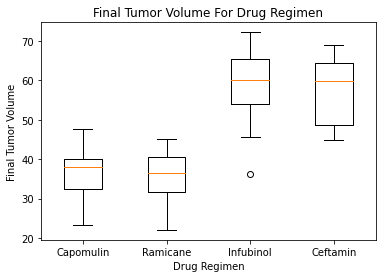

In [70]:
#generate a box plot of the final tumor volume of each mouse across four regimens of interest



treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol_Cap = []
final_tumor_vol_Ram = []
final_tumor_vol_Inf = []
final_tumor_vol_Cef = []


for treatment in treatments:
    final_tumor_vol_Cap = study_data_4drugs.loc[study_data_4drugs['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'] 
    final_tumor_vol_Cap.append(final_tumor_vol_Cap)
    final_tumor_vol_Ram = study_data_4drugs.loc[study_data_4drugs['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'] 
    final_tumor_vol_Ram.append(final_tumor_vol_Ram)
    final_tumor_vol_Inf = study_data_4drugs.loc[study_data_4drugs['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)'] 
    final_tumor_vol_Inf.append(final_tumor_vol_Inf)
    final_tumor_vol_Cef = study_data_4drugs.loc[study_data_4drugs['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)'] 
    final_tumor_vol_Cef.append(final_tumor_vol_Cef)


volumes = [final_tumor_vol_Cap, final_tumor_vol_Ram, final_tumor_vol_Inf, final_tumor_vol_Cef]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume For Drug Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')
#FLIERPROPS DOESN'T FILL OUTLIER WITH RED, FIX THIS
ax1.boxplot(volumes, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops=dict(color='r'))
plt.show()



## Line and Scatter Plots

In [82]:
#isolated view of just capomulin for later use

study_data_capomulin = study_data_clean_too.loc[(study_data_clean_too['Drug Regimen'] == 'Capomulin')]
study_data_capomulin

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
226      j246          0           45.000000                 0    Capomulin   
227      r554          0           45.000000                 0    Capomulin   
228      s185          0           45.000000                 0    Capomulin   
229      b742          0           45.000000                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1854     s710         45           40.728578                 1    Capomulin   
1859     j119         45           38.125164                 1    Capomulin   
1878     i557         45           47.685963                 1    Capomulin   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
226   Female          21          21  
227   Female           8          17  
228   Female           3          17  
229     Male           7          21  
...      ...         ...         ...  
1854  Female           1          23  
1859  Female           7          23  
1878  Female           1          24  
1888    Male          12          25  
1889    Male          18          17  

[230 rows x 8 columns]

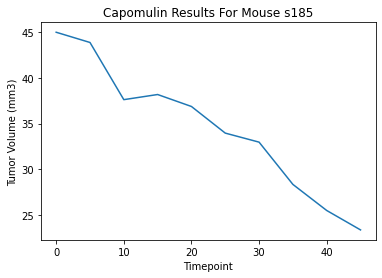

In [89]:
#generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#change index to mouse ID 
#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
#remove other mouse IDs so only s185 shows

x_axis_data = study_data_capomulin.loc[study_data_capomulin['Mouse ID'] == 's185', 'Timepoint']
y_axis_data = study_data_capomulin.loc[study_data_capomulin['Mouse ID'] == 's185', 'Tumor Volume (mm3)']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Results For Mouse s185')

plt.plot(x_axis_data, y_axis_data)






In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data